In [ ]:
import tensorflow as tf
from keras import datasets
from keras import models
from keras import layers
from keras.utils import to_categorical
from keras.layers import LSTM, Dense, Dropout, Masking, Embedding, ConvLSTM2D, RNN, BatchNormalization, GRU
import tensorflow_probability as tfp
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import time
%matplotlib inline
#loading iris
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
#NN tensorflow
X = iris.data[0:,0:2]#2 is not included
X = X.reshape(X.shape+(1,))
Y = iris.target
encoder = LabelEncoder()
Y1 = encoder.fit_transform(Y)
Y = to_categorical(Y1)


#splitting data into 2 parts 4 to 1 training and testing: 80% training, 20% testing 
X_training,X_testing,Y_training,Y_testing = train_test_split(X,Y,test_size = 0.2, random_state=1)



In [ ]:


print("X_training is:", X_training.shape)
print("Y_training is:", Y_training.shape)
print("X_testing is:", X_testing.shape)
print("Y_testing is:", Y_testing.shape)

X_training is: (120, 2, 1)
Y_training is: (120, 3)
X_testing is: (30, 2, 1)
Y_testing is: (30, 3)


In [ ]:

# Sequential model
model = models.Sequential()

#Normalizes batch within 1 standard deviation of each other
model.add(BatchNormalization())

# Recurrent layer
model.add(LSTM(4))
#model.add(GRU(4))

# Output layer
model.add(layers.Dense(3, activation = "sigmoid"))

# Compile the model
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])


In [ ]:

#training the model
history = model.fit(X_training, Y_training, epochs = 200, batch_size = 5)

Epoch 1/200
24/24 [==============================] - 2s 2ms/step - loss: 1.0937 - accuracy: 0.4250
Epoch 2/200
24/24 [==============================] - 0s 3ms/step - loss: 1.0905 - accuracy: 0.4583
Epoch 3/200
24/24 [==============================] - 0s 2ms/step - loss: 1.0885 - accuracy: 0.4167
Epoch 4/200
24/24 [==============================] - 0s 2ms/step - loss: 1.0843 - accuracy: 0.4833
Epoch 5/200
24/24 [==============================] - 0s 3ms/step - loss: 1.0816 - accuracy: 0.4917
Epoch 6/200
24/24 [==============================] - 0s 3ms/step - loss: 1.0800 - accuracy: 0.4917
Epoch 7/200
24/24 [==============================] - 0s 2ms/step - loss: 1.0748 - accuracy: 0.4667
Epoch 8/200
24/24 [==============================] - 0s 3ms/step - loss: 1.0687 - accuracy: 0.4833
Epoch 9/200
24/24 [==============================] - 0s 2ms/step - loss: 1.0635 - accuracy: 0.5083
Epoch 10/200
24/24 [==============================] - 0s 2ms/step - loss: 1.0558 - accuracy: 0.5000
Epoch 11/

In [ ]:
#checking the model
scores = model.evaluate(X_testing, Y_testing)
test_loss = scores[0]
test_accuracy = scores[1]

print ('test loss:',test_loss)
print ('test accuracy:', test_accuracy)
print ('errors:', int(10000*(1-test_accuracy)))
print("Accuracy Percent:%.2f%%" % (scores[1] * 100))

1/1 [==============================] - 0s 23ms/step - loss: 0.4227 - accuracy: 0.8000
test loss: 0.4226616322994232
test accuracy: 0.800000011920929
errors: 1999
Accuracy Percent:80.00%


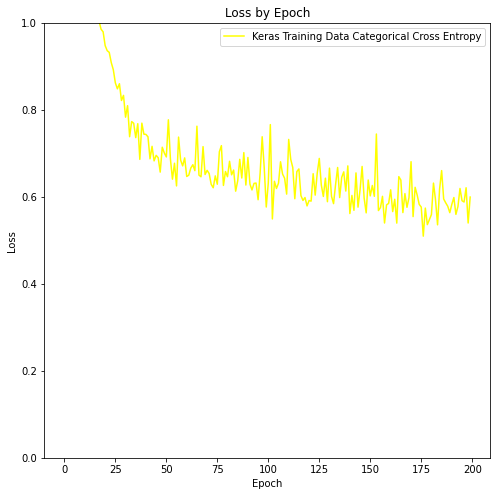

In [ ]:
#plotting the categorical cross entropy of the model
plt.figure(figsize=(8,8))
plt.plot(history.history['loss'], label='Keras Training Data Categorical Cross Entropy', color='yellow')
plt.title('Loss by Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.0,1])
plt.legend(loc='upper right')

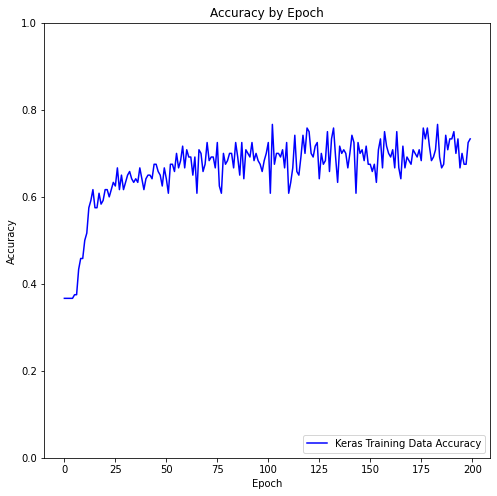

In [ ]:
#plotting the categorical cross entropy of the accuracy
plt.figure(figsize=(8,8))
plt.plot(history.history['accuracy'], label='Keras Training Data Accuracy',color='blue')
plt.title('Accuracy by Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0,1])
plt.legend(loc='lower right')

In [ ]:
#SVM
X = iris.data
Y = iris.target

# set up some stuff for the plots

Xzeros0 = (0. * X) + .2
Xzeros1 = (0. * X) 
Xzeros2 = (0. * X) - .2

x_min, x_max = X.min() - 0.5, X.max() + 1.5

# get Iris classifications

IC = np.unique(Y) #getting unique elements of the array
IrisC = ('Setosa','Versicolor','Virginica')#adding names
pltC = ('red', 'blue', 'green')#colors
pltCback = ('pink', 'lightblue','lightgreen')#colors
pltM = ('o', 'x', '*')#maps
for i in range(0,3):
    print (IC[i],pltM[i],IrisC[i],pltC[i],pltCback[i])
# setup Iris feature lablels

IrisF=("sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)")
for i in range(0,4):
    print(IrisF[i])

0 o Setosa red pink
1 x Versicolor blue lightblue
2 * Virginica green lightgreen
sepal length (cm)
sepal width (cm)
petal length (cm)
petal width (cm)


In [ ]:
# choose the classes and features to be included in the model
#deprecated

cdx = np.array([0,1,2])             # this array contains the classes to be considered (can be 2-3 classes)
fdx = np.array([0,1,2,3])           # this array contains the features to be considered (can be 1-4 features)

nC = len(cdx)
nF = len(fdx)

print('\nClasses')
for i in range(nC):
    print(cdx[i],IrisC[cdx[i]])
    
print('\nFeatures')
for i in range(nF):
    print(fdx[i],IrisF[fdx[i]])


Classes
0 Setosa
1 Versicolor
2 Virginica

Features
0 sepal length (cm)
1 sepal width (cm)
2 petal length (cm)
3 petal width (cm)


In [ ]:
# build the XX and YY arrays
# this is the modified code from the adaline sample you provided in the sample code section
# it's a function that creates XX and YY arrays rather then being a single time use code since this code will be reused to build 15 more pairs of XX and YY
def construct_arrays(classes, features):
    i = 0
    numY = 0
    nC = len(classes)
    nF = len(features)
    for i in range(len(Y)):
        for j in range(nC):
            if Y[i] == IC[classes[j]]:
                numY += 1

    YY = np.zeros((numY))
    XX = np.zeros((numY,nF))
    if (len(fdx) == 1):
        XXzeros0 = (0. * XX) + .2
        XXzeros1 = (0. * XX) 
        XXzeros2 = (0. * XX) - .2

    j = 0
    for i in range(len(Y)):
        for k in range(nC):
            if Y[i] == IC[classes[k]]:        
                YY[j] = IC[classes[k]]
                for m in range(nF):
                    XX[j,m] = X[i,features[m]] 
                j += 1
    return XX,YY     

In [ ]:
def plotting(cdf,fdx,IC,XX,YY):
    cdx = np.array([0,1,2])             # this array contains the classes to be considered (can be 2-3 classes)
    fdx = np.array([0,1])           # this array contains the features to be considered (can be 1-4 features)

    nC = len(cdx)
    nF = len(fdx)
    i = 0
    numY = 0
    for i in range(len(Y)):
        for j in range(nC):
            if Y[i] == IC[cdx[j]]:
                numY += 1

    YY = np.zeros((numY))
    XX = np.zeros((numY,nF))
    if (len(fdx) == 1):
        XXzeros0 = (0. * XX) + .2
        XXzeros1 = (0. * XX) 
        XXzeros2 = (0. * XX) - .2

    j = 0
    for i in range(len(Y)):
        for k in range(nC):
            if Y[i] == IC[cdx[k]]:        
                YY[j] = IC[cdx[k]]
                for m in range(nF):
                    XX[j,m] = X[i,fdx[m]] 
                j += 1

    clf = SGDClassifier(tol=1e-4, random_state=0, loss='hinge')

    clf.fit(XX,YY)


    plt.close('all')

    if (len(fdx) == 1):
        
        fig, ax = plt.subplots(figsize=(8,2))
        
        xx = np.arange(x_min,x_max, 0.05).reshape((-1,1))
        yy = clf.predict(xx)
        
        xxzeros1 = (0. * xx) + .5

    # plot the decision regions

        if (IC[0] in cdx): ax.scatter(xx[yy == IC[0],0], xxzeros1[yy == IC[0]],
                        color=pltC[0], marker='.')
        if (IC[1] in cdx): ax.scatter(xx[yy == IC[1],0], xxzeros1[yy == IC[1]],
                        color=pltC[1], marker='.')
        if (IC[2] in cdx): ax.scatter(xx[yy == IC[2],0], xxzeros1[yy == IC[2]],
                        color=pltC[2], marker='.')   

    # plot the data

        if (IC[0] in cdx): ax.scatter(XX[YY == IC[0],0], XXzeros0[YY == IC[0]],
                        color=pltC[0], marker=pltM[0], label=IrisC[0])
        if (IC[1] in cdx): ax.scatter(XX[YY == IC[1],0], XXzeros1[YY == IC[1]],
                        color=pltC[1], marker=pltM[1], label=IrisC[1])
        if (IC[2] in cdx): ax.scatter(XX[YY == IC[2],0], XXzeros2[YY == IC[2]],
                        color=pltC[2], marker=pltM[2], label=IrisC[2])    
        
        ax.set_xlim(x_min,x_max)
        ax.set_ylim(-1.,+2.)
        ax.set_xlabel(IrisF[fdx[0]])
        ax.axes.yaxis.set_visible(False)
        ax.legend(loc='upper right', fontsize='x-small')
        plt.show()    

    elif (len(fdx) == 2):
        
        fig, ax = plt.subplots(figsize=(8,8))

        xx1, xx2 = np.meshgrid(np.arange(x_min,x_max,0.05), np.arange(x_min,x_max,0.05))                     
        yy = clf.predict(np.c_[xx1.ravel(), xx2.ravel()])
        yy = yy.reshape(xx1.shape)

    # plot the decision regions    
        
        if (IC[0] in cdx): ax.scatter(xx1[yy == IC[0]], xx2[yy == IC[0]],
                        color=pltCback[0], marker='.')
        if (IC[1] in cdx): ax.scatter(xx1[yy == IC[1]], xx2[yy == IC[1]], 
                        color=pltCback[1], marker='.')
        if (IC[2] in cdx): ax.scatter(xx1[yy == IC[2]], xx2[yy == IC[2]],
                        color=pltCback[2], marker='.')    

    # plot the data

        if (IC[0] in cdx): ax.scatter(XX[YY == IC[0],0], XX[YY == IC[0],1],
                        color=pltC[0], marker=pltM[0], label=IrisC[0])
        if (IC[1] in cdx): ax.scatter(XX[YY == IC[1],0], XX[YY == IC[1],1], 
                        color=pltC[1], marker=pltM[1], label=IrisC[1])
        if (IC[2] in cdx): ax.scatter(XX[YY == IC[2],0], XX[YY == IC[2],1],
                        color=pltC[2], marker=pltM[2], label=IrisC[2])
            
        ax.set_xlim(x_min,x_max)
        ax.set_ylim(x_min,x_max)
        ax.set_xlabel(IrisF[fdx[0]])
        ax.set_ylabel(IrisF[fdx[1]])
        ax.legend(loc='upper right', fontsize='small')
        plt.show()    
        
    elif (len(fdx) == 3):
        
        ixm = fdx[0]
        iym = fdx[1]
        izm = fdx[2]
        xF = IrisF[ixm]
        yF = IrisF[iym]
        zF = IrisF[izm]

        fig = plt.figure(figsize=(6,6))    
        ax = plt.axes(projection='3d')   

    # plot the data points

        if (IC[0] in cdx): ax.scatter3D(X[Y == IC[0],ixm], X[Y == IC[0],iym], X[Y == IC[0],izm], 
            color=pltC[0], marker=pltM[0], label=IrisC[0])
        if (IC[1] in cdx): ax.scatter3D(X[Y == IC[1],ixm], X[Y == IC[1],iym], X[Y == IC[1],izm], 
            color=pltC[1], marker=pltM[1], label=IrisC[1])
        if (IC[2] in cdx): ax.scatter3D(X[Y == IC[2],ixm], X[Y == IC[2],iym], X[Y == IC[2],izm], 
            color=pltC[2], marker=pltM[2], label=IrisC[2])    

        ax.set_xlim(x_min,x_max)
        ax.set_ylim(x_min,x_max)
        ax.set_zlim(x_min,x_max)
        ax.set_xlabel(xF)
        ax.set_ylabel(yF)
        ax.set_zlabel(zF)            
        ax.legend(loc='upper right', fontsize='small')
        plt.show() 
        
    # if there are two classes, add the decision boundary and plot again
                
        A = clf.fit(XX,YY)
        Acl =  A.classes_
        if (len(Acl) == 2):  
            
            fig = plt.figure(figsize=(6,6))    
            ax = plt.axes(projection='3d')   

        # plot the data points

            if (IC[0] in cdx): ax.scatter3D(X[Y == IC[0],ixm], X[Y == IC[0],iym], X[Y == IC[0],izm], 
                color=pltC[0], marker=pltM[0], label=IrisC[0])
            if (IC[1] in cdx): ax.scatter3D(X[Y == IC[1],ixm], X[Y == IC[1],iym], X[Y == IC[1],izm], 
                color=pltC[1], marker=pltM[1], label=IrisC[1])
            if (IC[2] in cdx): ax.scatter3D(X[Y == IC[2],ixm], X[Y == IC[2],iym], X[Y == IC[2],izm], 
                color=pltC[2], marker=pltM[2], label=IrisC[2])    

        
            Ai = A.intercept_
            Acoef = A.coef_
            xgrid = np.arange(x_min,x_max,0.05)       
            nx = len(xgrid)
            for i in range(nx):
                for j in range(nx):
                    z = -(Acoef[0,0]*xgrid[i]+Acoef[0,1]*xgrid[j]+Ai[0])/Acoef[0,2]
                    if ((z>=x_min)&(z<=x_max)): ax.scatter3D(xgrid[i],xgrid[j],z,marker='.',color='lightgray')

            ax.set_xlim(x_min,x_max)
            ax.set_ylim(x_min,x_max)
            ax.set_zlim(x_min,x_max)
            ax.set_xlabel(xF)
            ax.set_ylabel(yF)
            ax.set_zlabel(zF)            
            ax.legend(loc='upper right', fontsize='small')
            plt.show() 

In [ ]:
Mclasses=np.array([0,1,2]) #classes
Mfeatures=np.array([0,1])#subsets with features
XX,YY=construct_arrays(Mclasses,Mfeatures)
linear = svm.SVC(kernel = 'linear')
linear.fit(XX,YY)

SVC(kernel='linear')

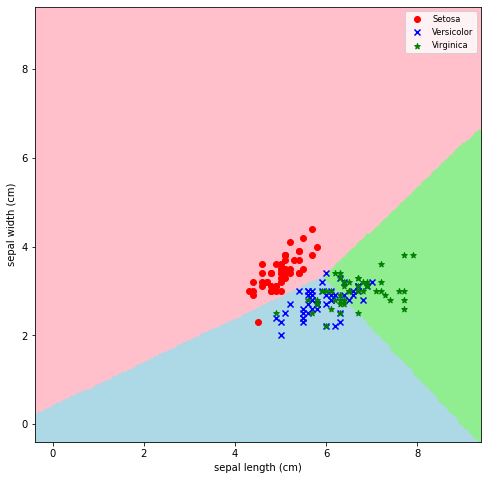

Accuray SVM with linear kernel:  0.82


In [ ]:
plotting(cdx,fdx,IC,XX,YY)
print('Accuray SVM with linear kernel: ', linear.score(XX,YY))

So in this project, I used Keras library and TensorFlow to accomplish the task of applying neural networks on the iris dataset. I used the first and the second features and all the classes available. The average accuracy for the neural network model was less compared to the one I got in SVM. Even though sometimes it performed better, there were times when it performed critically worse than the SVM, and on average, it was worse. However, it is to be expected for SVM to perform better since there are only two features, and the linear kernel will produce content results compared to the neural network; however, if we increase the number of features, the neural network will perform better in order to do that you can just experiment with the Mfeatures array to do that.